In [12]:
!pip3 install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
distutils: /home/ffc4001/.local/lib/python3.9/site-packages
sysconfig: /home/ffc4001/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


In [116]:
import torch
import os
import pandas as pd
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from torch import nn, optim
import torch.nn.functional as F
import torch.utils.data as data
import torch

In [14]:
torch.rand(2, 3)

tensor([[0.8878, 0.4581, 0.0347],
        [0.6890, 0.7907, 0.0552]])

In [17]:
#Load data into data loader

2

In [30]:
#df = pd.read_csv("ukbiobank_variantsonly.csv")

In [86]:
#df.drop(["Batch"], axis=1, inplace=True)

In [88]:
#df.to_csv("samp.csv")

In [99]:
df.columns[647]

'Y'

In [ ]:
df

In [94]:
class VariantsDataset(Dataset):
    """Variants."""

    def __init__(self, csv_file):
        """Initializes instance of class Variants.
        Args:
            csv_file (str): Path to the csv file with the students data.
        """
        df = pd.read_csv(csv_file)

        # Grouping variable names
        #self.categorical = ["gender", "race/ethnicity", "parental level of education", "lunch",
                           #"test preparation course"]
        
        self.target = "Y"

        # One-hot encoding of categorical variables
        self.variants = df

        # Save target and predictors
        self.X = torch.tensor(self.variants.drop(self.target, axis=1).values, dtype=torch.float32)
        self.y = torch.tensor(self.variants[self.target].values, dtype=torch.float32)
        

    def __len__(self):
        return len(self.variants)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [102]:
#  ---------------  Model  ---------------

class Net(nn.Module):
    def __init__(self, D_in, H=100, D_out=1):
        super().__init__()
        self.fc1 = nn.Linear(D_in, H)
        self.fc2 = nn.Linear(H, D_out)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = F.sigmoid(self.fc2(x))

        return x

In [118]:
#  ---------------  Training  ---------------

def train(csv_file, n_epochs=3):
    """Trains the model.
    Args:
        csv_file (str): Absolute path of the dataset used for training.
        n_epochs (int): Number of epochs to train.
    """
    # Load dataset
    mod
    dataset = VariantsDataset(csv_file)

    # Split into training and test
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    trainset, testset = random_split(dataset, [train_size, test_size])
    
    #Imputation
    
    
    # Dataloaders
    trainloader = DataLoader(trainset, batch_size=200, shuffle=True)
    testloader = DataLoader(testset, batch_size=200, shuffle=False)

    # Use gpu if available
    device = torch.device("cpu")

    # Define the model
    D_in, H = 648, 100
    net = Net(D_in, H).to(device)

    # Loss function
    criterion = nn.MSELoss()

    # Optimizer
    optimizer = optim.Adam(net.parameters(), weight_decay=0.0001)

    # Train the net
    loss_per_iter = []
    loss_per_batch = []
    for epoch in range(n_epochs):

        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = net(inputs.float())
            loss = criterion(outputs, labels.float())
            loss.backward()
            optimizer.step()
            if (i+1) % 100 == 0:
                print('Epoch [%d/%d], Iter [%d] Loss: %.4f' %(epoch+1, 10, i+1, loss.data[0]))
            # Save loss to plot
            running_loss += loss.item()
            loss_per_iter.append(loss.item())

        loss_per_batch.append(running_loss / (i + 1))
        running_loss = 0.0
Net.eval()
test = testloader
test = test.values.reshape(28000,1,28,28).astype(float)
test = Variable(torch.Tensor(test))

pred = model(test)

_, predlabel = torch.max(pred.data, 1)
predlabel = predlabel.tolist()

predlabel = pd.DataFrame(predlabel)
predlabel.index = np.arange(28000) + 1
id = np.arange(28000) + 1
id = pd.DataFrame(id)
id.index = id.index + 1

predlabel = pd.concat([id,predlabel], axis=1)
predlabel.columns = ["ImageId", "Label"]

predlabel.to_csv('predict.csv', index= False)


TypeError: eval() missing 1 required positional argument: 'self'

In [ ]:
  # Comparing training to test
    dataiter = iter(testloader)
    inputs, labels = next(dataiter)
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = net(inputs.float())
    print("Root mean squared error")
    print("Training:", np.sqrt(loss_per_batch[-1]))
    print("Test", np.sqrt(criterion(labels.float(), outputs).detach().cpu().numpy()))

    # Plot training loss curve
    plt.plot(np.arange(len(loss_per_iter)), loss_per_iter, "-", alpha=0.5, label="Loss per epoch")
    plt.plot(np.arange(len(loss_per_iter), step=4) + 3, loss_per_batch, ".-", label="Loss per mini-batch")
    plt.xlabel("Number of epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()




Root mean squared error
Training: nan
Test nan


ValueError: x and y must have same first dimension, but have shapes (1226,) and (3,)

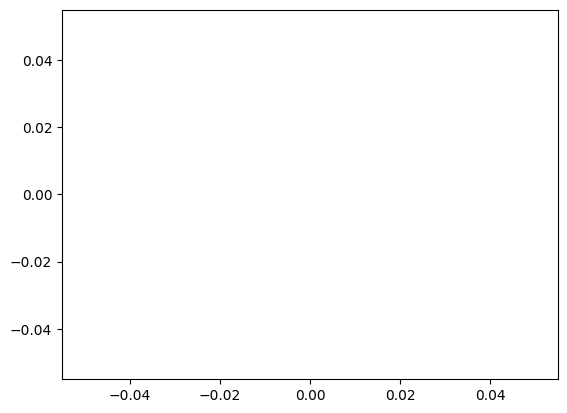

In [112]:
train("samp.csv")